<a href="https://colab.research.google.com/github/pharringtonp19/presidential-policies/blob/main/notebooks/tariffs/ManufacturingEmployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime as dt
from google.colab import userdata
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [22]:
start, end = dt.datetime(1945, 4, 12), dt.datetime(2025, 1, 20)
manufacturing = web.DataReader("MANEMP", "fred", start, end)
manufacturing['MANEMP'] = manufacturing['MANEMP']/1e3
manufacturing.head()

,MANEMP
DATE,
1945-05-01,15.201
1945-06-01,14.948
1945-07-01,14.599
1945-08-01,14.201
1945-09-01,12.486


In [23]:
presidents = [
    ("Truman", dt.datetime(1945, 4, 12), dt.datetime(1953, 1, 20)),
    ("Eisenhower", dt.datetime(1953, 1, 20), dt.datetime(1961, 1, 20)),
    ("Kennedy", dt.datetime(1961, 1, 20), dt.datetime(1963, 11, 22)),
    ("Johnson", dt.datetime(1963, 11, 22), dt.datetime(1969, 1, 20)),
    ("Nixon", dt.datetime(1969, 1, 20), dt.datetime(1974, 8, 9)),
    ("Ford", dt.datetime(1974, 8, 9), dt.datetime(1977, 1, 20)),
    ("Carter", dt.datetime(1977, 1, 20), dt.datetime(1981, 1, 20)),
    ("Reagan", dt.datetime(1981, 1, 20), dt.datetime(1989, 1, 20)),
    ("Bush", dt.datetime(1989, 1, 20), dt.datetime(1993, 1, 20)),
    ("Clinton", dt.datetime(1993, 1, 20), dt.datetime(2001, 1, 20)),
    ("Bush", dt.datetime(2001, 1, 20), dt.datetime(2009, 1, 20)),
    ("Obama", dt.datetime(2009, 1, 20), dt.datetime(2017, 1, 20)),
    ("Trump", dt.datetime(2017, 1, 20), dt.datetime(2021, 1, 20)),
    ("Biden", dt.datetime(2021, 1, 20), dt.datetime(2025, 1, 20)),
]# Add vertical lines and president names



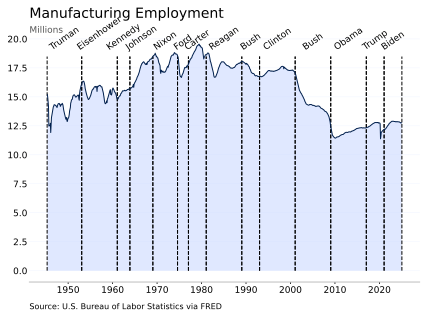

In [29]:
x, y = manufacturing.index, manufacturing['MANEMP']

# --- NYT-style colors ---
line_color     = "#001f4d"  # deep navy (main line)
fill_color     = "#ccd9ff"  # very light blue fill
forecast_fill  = "#99b3ff"  # medium-light navy/blue for forecast shading
grid_color     = "#f0f4ff"  # almost white with a blue tint for grid

fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")

# area + line
ax.fill_between(x, 0, y, color=fill_color, linewidth=0, zorder=1, alpha=0.6)
ax.yaxis.grid(True, color=grid_color, linewidth=.5, zorder=2)
ax.plot(x, y, color=line_color, linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")

# spines & ticks (keep only a subtle bottom spine)
for side in ("top", "left", "right"):
    ax.spines[side].set_visible(False)
ax.spines["bottom"].set_color("#bdbdbd")
ax.spines["bottom"].set_linewidth(1)

ax.tick_params(axis="x", length=2, labelsize=9, pad=2)
ax.tick_params(axis="y", length=0, labelsize=9, pad=2)

# tidy limits
ax.set_axisbelow(True)            # any future gridlines stay behind

# title + subtitle (left-aligned)
ax.text(0., 1.06, s='Manufacturing Employment', transform=ax.transAxes, size=14)
ax.text(0, 1.00, "Millions", transform=ax.transAxes,
        fontsize=9, color="#555555")

ax.annotate("Source: U.S. Bureau of Labor Statistics via FRED",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)

# Add vertical lines and president names
ymin, ymax = ax.get_ylim()

for name, start_date, end_date in presidents:
    # short vertical lines at the top
    ax.vlines([start_date, end_date], 0, ymax*.9, color="black", linestyle="--", linewidth=1)

    # text in the middle above those lines
    mid_date = start_date + (end_date - start_date)/2
    ax.text(mid_date, ymax*0.92, name, ha="center", va="bottom", fontsize=9, rotation=35)


fig.savefig("manufacturing_employment.png", bbox_inches="tight", dpi=300)
plt.show()